In [216]:
#!pip install python-binance pandas mplfinance
#!pip install pandas-datareader


In [217]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd
import datetime as dt
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import numpy as np
import csv
from IPython.display import display
from textblob import TextBlob
%matplotlib inline

Binance API Data

In [218]:
client = Client(apikey, secret)

In [ ]:
tickers =client.get_all_tickers()
tickers

In [220]:
tickers[558]

{'symbol': 'DOGEUSDT', 'price': '0.15190000'}

In [221]:
ticker_df = pd.DataFrame(tickers)

In [222]:
ticker_df.set_index('symbol', inplace=True)

In [223]:
ticker_df.loc['DOGEUSDT']

price    0.15190000
Name: DOGEUSDT, dtype: object

In [224]:
historical = client.get_historical_klines('DOGEUSDT', client.KLINE_INTERVAL_1DAY, '1 jan 2016')

In [ ]:
historical


In [226]:
hist_df = pd.DataFrame(historical)

In [227]:
hist_df.head()



,0,1,2,3,4,5,6,7,8,9,10,11
0,1562284800000,0.00449000,0.00460000,0.00355000,0.00387010,1928297660.00000000,1562371199999,7506289.39817290,18589,858403324.00000000,3336426.01151920,0
1,1562371200000,0.00387410,0.00394260,0.00336520,0.00350000,1010744287.00000000,1562457599999,3692804.08878380,17250,522724122.00000000,1908499.50964960,0
2,1562457600000,0.00350400,0.00365000,0.00340000,0.00353770,530613992.00000000,1562543999999,1860353.07168390,9394,275110757.00000000,965093.40977300,0
3,1562544000000,0.00353780,0.00356180,0.00340000,0.00345800,308445688.00000000,1562630399999,1078072.00566180,4958,159456967.00000000,558024.17586270,0
4,1562630400000,0.00346200,0.00358200,0.00335640,0.00345450,253375582.00000000,1562716799999,878528.33377630,5690,115809520.00000000,402047.29506700,0


In [228]:
hist_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Time', 'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore'] 

In [229]:

hist_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Time,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,1562284800000,0.00449000,0.00460000,0.00355000,0.00387010,1928297660.00000000,1562371199999,7506289.39817290,18589,858403324.00000000,3336426.01151920,0
1,1562371200000,0.00387410,0.00394260,0.00336520,0.00350000,1010744287.00000000,1562457599999,3692804.08878380,17250,522724122.00000000,1908499.50964960,0
2,1562457600000,0.00350400,0.00365000,0.00340000,0.00353770,530613992.00000000,1562543999999,1860353.07168390,9394,275110757.00000000,965093.40977300,0
3,1562544000000,0.00353780,0.00356180,0.00340000,0.00345800,308445688.00000000,1562630399999,1078072.00566180,4958,159456967.00000000,558024.17586270,0
4,1562630400000,0.00346200,0.00358200,0.00335640,0.00345450,253375582.00000000,1562716799999,878528.33377630,5690,115809520.00000000,402047.29506700,0


In [230]:
hist_df['Open Time'] = pd.to_datetime(hist_df['Open Time']/1000, unit='s')
hist_df['Close Time'] = pd.to_datetime(hist_df['Close Time']/1000, unit='s')


In [231]:
hist_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Time,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2019-07-05,0.00449000,0.00460000,0.00355000,0.00387010,1928297660.00000000,2019-07-05 23:59:59.999000064,7506289.39817290,18589,858403324.00000000,3336426.01151920,0
1,2019-07-06,0.00387410,0.00394260,0.00336520,0.00350000,1010744287.00000000,2019-07-06 23:59:59.999000064,3692804.08878380,17250,522724122.00000000,1908499.50964960,0
2,2019-07-07,0.00350400,0.00365000,0.00340000,0.00353770,530613992.00000000,2019-07-07 23:59:59.999000064,1860353.07168390,9394,275110757.00000000,965093.40977300,0
3,2019-07-08,0.00353780,0.00356180,0.00340000,0.00345800,308445688.00000000,2019-07-08 23:59:59.999000064,1078072.00566180,4958,159456967.00000000,558024.17586270,0
4,2019-07-09,0.00346200,0.00358200,0.00335640,0.00345450,253375582.00000000,2019-07-09 23:59:59.999000064,878528.33377630,5690,115809520.00000000,402047.29506700,0


In [232]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Time', 'TB Base Volume', 'TB Quote Volume']

In [233]:
hist_df[numeric_columns] = hist_df[numeric_columns].apply(pd.to_numeric, axis=1)


In [234]:
hist_df.tail()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Time,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
1006,2022-04-06,0.1727,0.1748,0.1410,0.1433,5.121715e+09,2022-04-06 23:59:59.999000064,7.983940e+08,885187,2.456817e+09,3.834208e+08,0
1007,2022-04-07,0.1432,0.1483,0.1400,0.1459,1.901324e+09,2022-04-07 23:59:59.999000064,2.746575e+08,268958,9.159450e+08,1.323407e+08,0
1008,2022-04-08,0.1459,0.1534,0.1404,0.1424,2.219140e+09,2022-04-08 23:59:59.999000064,3.274049e+08,316228,1.099084e+09,1.622202e+08,0
1009,2022-04-09,0.1423,0.1446,0.1405,0.1442,5.987070e+08,2022-04-09 23:59:59.999000064,8.553394e+07,104463,2.931591e+08,4.188595e+07,0
1010,2022-04-10,0.1442,0.1540,0.1435,0.1519,1.183249e+09,2022-04-10 23:59:59.999000064,1.761201e+08,188548,6.174195e+08,9.192438e+07,0


In [235]:
import mplfinance as mpf

In [236]:
hist_df.set_index('Close Time').tail(1460)

,Open Time,Open,High,Low,Close,Volume,Quote Asset Time,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
Close Time,,,,,,,,,,,
2019-07-05 23:59:59.999000064,2019-07-05,0.004490,0.004600,0.003550,0.003870,1.928298e+09,7.506289e+06,18589,8.584033e+08,3.336426e+06,0
2019-07-06 23:59:59.999000064,2019-07-06,0.003874,0.003943,0.003365,0.003500,1.010744e+09,3.692804e+06,17250,5.227241e+08,1.908500e+06,0
2019-07-07 23:59:59.999000064,2019-07-07,0.003504,0.003650,0.003400,0.003538,5.306140e+08,1.860353e+06,9394,2.751108e+08,9.650934e+05,0
2019-07-08 23:59:59.999000064,2019-07-08,0.003538,0.003562,0.003400,0.003458,3.084457e+08,1.078072e+06,4958,1.594570e+08,5.580242e+05,0
2019-07-09 23:59:59.999000064,2019-07-09,0.003462,0.003582,0.003356,0.003455,2.533756e+08,8.785283e+05,5690,1.158095e+08,4.020473e+05,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-06 23:59:59.999000064,2022-04-06,0.172700,0.174800,0.141000,0.143300,5.121715e+09,7.983940e+08,885187,2.456817e+09,3.834208e+08,0
2022-04-07 23:59:59.999000064,2022-04-07,0.143200,0.148300,0.140000,0.145900,1.901324e+09,2.746575e+08,268958,9.159450e+08,1.323407e+08,0
2022-04-08 23:59:59.999000064,2022-04-08,0.145900,0.153400,0.140400,0.142400,2.219140e+09,3.274049e+08,316228,1.099084e+09,1.622202e+08,0


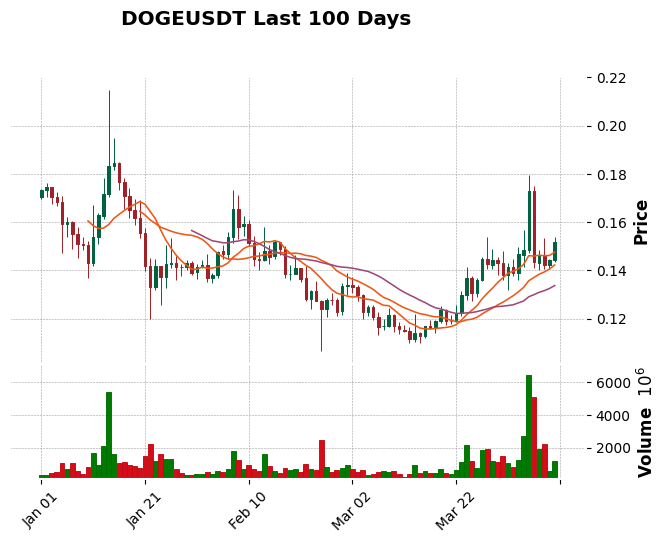

In [237]:
mpf.plot(hist_df.set_index('Open Time').tail(100), 
        type='candle', style='charles', 
        volume=True, 
        title='DOGEUSDT Last 100 Days', 
        mav=(10,20,30))

In [238]:
start = dt.datetime(2020,12,1)
end = dt.datetime(2021,11,1)


In [239]:
doge = web.DataReader('DOGE-USD', 'yahoo', start, end)

doge

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-01,0.003572,0.003269,0.003551,0.003335,80163603,0.003335
2020-12-02,0.003436,0.003293,0.003335,0.003374,58705661,0.003374
2020-12-03,0.003500,0.003352,0.003375,0.003428,47907032,0.003428
2020-12-04,0.003447,0.003285,0.003429,0.003298,45062222,0.003298
2020-12-05,0.003414,0.003268,0.003297,0.003397,43386583,0.003397
...,...,...,...,...,...,...
2021-10-29,0.306312,0.279771,0.299964,0.287853,5866664030,0.287853
2021-10-30,0.294647,0.259888,0.287764,0.268345,3637334331,0.268345
2021-10-31,0.284707,0.252614,0.269239,0.280244,4224104205,0.280244


In [240]:
start = dt.datetime(2021,5,13)
end = dt.datetime(2021,5,15)

In [241]:
doge = web.DataReader('DOGE-USD', 'yahoo', start, end)
doge

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-13,0.519461,0.357175,0.392176,0.490374,18663174069,0.490374
2021-05-14,0.589690,0.464622,0.487070,0.559604,20466177002,0.559604
2021-05-15,0.562676,0.491299,0.559668,0.507972,9836892944,0.507972
2021-05-16,0.548145,0.451023,0.507910,0.514895,9541552064,0.514895


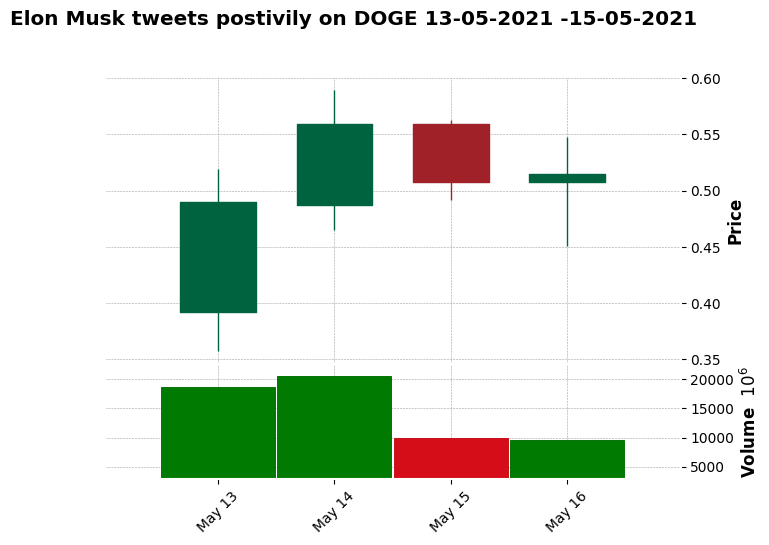

In [242]:
mpf.plot(doge, type = "candle" , volume=True, style="charles", title='Elon Musk tweets postivily on DOGE 13-05-2021 -15-05-2021  ')

In [243]:
start = dt.datetime(2021,5,9)
end = dt.datetime(2021,5,10)


In [244]:
doge = web.DataReader('DOGE-USD', 'yahoo', start, end)
doge

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-09,0.697625,0.425706,0.635820,0.570070,46138063928,0.570070
2021-05-10,0.569687,0.421291,0.569687,0.449964,16514521828,0.449964
2021-05-11,0.546651,0.445034,0.450488,0.495231,14566975476,0.495231


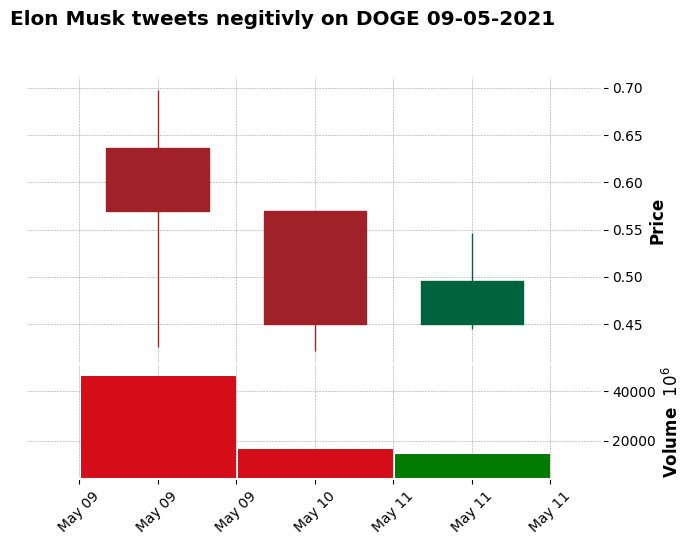

In [245]:
mpf.plot(doge, type = "candle" , volume=True, style="charles", title='Elon Musk tweets negitivly on DOGE 09-05-2021')

In [246]:
start = dt.datetime(2021,8,9)
end = dt.datetime(2021,9,9)

In [247]:
doge = web.DataReader('DOGE-USD', 'yahoo', start, end)
doge

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-08-09,0.266265,0.231410,0.240122,0.256897,4607903346,0.256897
2021-08-10,0.262791,0.245352,0.256366,0.257325,3424415504,0.257325
2021-08-11,0.282482,0.256382,0.257424,0.265263,4732068476,0.265263
2021-08-12,0.294142,0.252775,0.264853,0.263921,5264857508,0.263921
2021-08-13,0.287188,0.261907,0.264249,0.286808,3565092106,0.286808
2021-08-14,0.298456,0.277154,0.286801,0.293113,4677579997,0.293113
2021-08-15,0.348722,0.287063,0.294086,0.341441,8046171669,0.341441
2021-08-16,0.350953,0.310828,0.340165,0.320715,6681324187,0.320715
2021-08-17,0.339462,0.295763,0.319631,0.299442,5699700481,0.299442


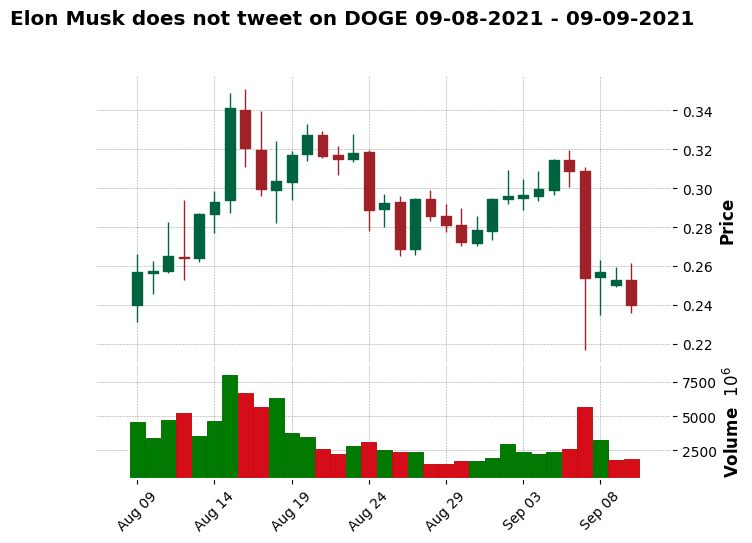

In [248]:
mpf.plot(doge, type = "candle" , volume=True, style="charles", title='Elon Musk does not tweet on DOGE 09-08-2021 - 09-09-2021')

In [249]:
df = pd.read_csv('Dogecoin Historical Data.csv', usecols=['Date', 'High'])
df['Date'] = pd.to_datetime(df['Date'])
df['Pct change'] = df['High'].pct_change().multiply(100)

tweets_df = pd.read_csv('53tweets.csv', usecols=['Date', 'Tweet', 'Time'])
tweets_df['Offset'] = tweets_df['Time'].apply(lambda time: '1 days' if time.find('pm') > -1 else 0)
tweets_df['Date'] = (pd.to_datetime(tweets_df['Date']) + pd.to_timedelta(tweets_df['Offset']))
data = pd.merge(df, tweets_df, on="Date")

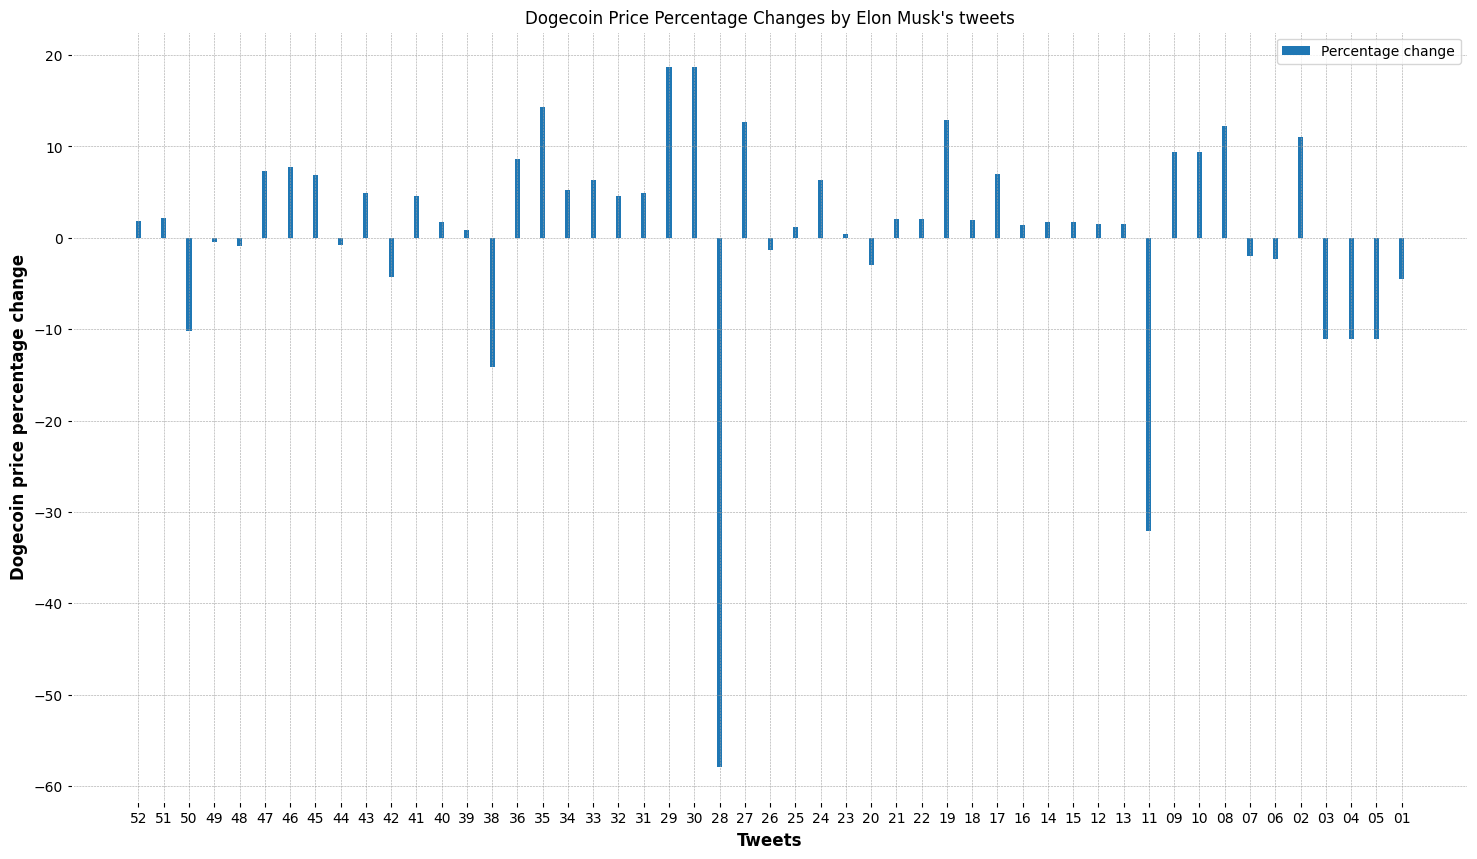

In [250]:
fig, ax = plt.subplots(figsize=(18,10))
width = 0.2
labels = list(map(lambda x: x.replace('tweet', ''), data['Tweet'].values.tolist()))
percentage_change = data['Pct change'].values.tolist()
ax.bar(labels, percentage_change, width, label='Percentage change')
ax.set_ylabel('Dogecoin price percentage change')
ax.set_xlabel('Tweets')
ax. set_title("Dogecoin Price Percentage Changes by Elon Musk's tweets")
ax.legend()
plt.show()

In [251]:
datafile ='53tweets.csv'

In [252]:
raw_data = pd.read_csv(datafile, parse_dates=[0], infer_datetime_format=True)

In [253]:
reindexed_data = raw_data['Tweet']
reindexed_data.index = raw_data['Text']

In [254]:
raw_data.head()


,Tweet,Date,Time,Text
0,tweet01,Dec-02-2017,7:33 pm,"{""Text"":""@highqualitysh1t I love the thought o..."
1,tweet02,Apr-04-2019,10:24 am,"{""Text"":""@Tom_Heats Dogecoin might be my fav c..."
2,tweet03,Apr-02-2019,8:40 pm,"{""Text"":""@dogecoin Uh oh"""
3,tweet04,Apr-02-2019,9:16 pm,"{""Text"":""Dogecoin rulz https://t.co/flWWUgAgLU"""
4,tweet05,Apr-02-2019,9:38 pm,"{""Text"":""Dogecoin value may vary https://t.co/..."


In [255]:
positive_sentence = "dogecoin, doge, dogecoin is for the people, dogecoin is good!"
neutral_sentence = "dogecoin looks okay"
negative_sentence = "dogecoin is bad"

In [256]:
positive_blob = TextBlob(positive_sentence)
neutral_blob = TextBlob(neutral_sentence)
negative_blob = TextBlob(negative_sentence)

In [257]:
print("Positive sentence: ", positive_blob.sentiment)
print("Neutral sentence: ", neutral_blob.sentiment)
print("Negative sentence: ", negative_blob.sentiment)

Positive sentence:  Sentiment(polarity=0.875, subjectivity=0.6000000000000001)
Neutral sentence:  Sentiment(polarity=0.5, subjectivity=0.5)
Negative sentence:  Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)


Stopwords


In [258]:
import io
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [259]:
# word_tokenize accepts

#stop_words = set(stopwords.words('english'))
#file1 = open('data-clensing.csv', encoding= "UTF-8")

In [260]:
#line = file1.read()
#words = line.split()
#for r in words:
   # if not r in stop_words:
      #  appendFile = open('fstop.txt','a', encoding="utf-8")
      #  appendFile.write(" "+r)
       # appendFile.close()



```
Frequency distabution in Tweets collected 

```



In [261]:
import nltk
from nltk.corpus import webtext
from nltk.probability import FreqDist

In [262]:
wt_words = open('fstop.txt', encoding= "UTF-8")
mydata = wt_words.read()
# add individual characters you want to get rid of
for c in "#0123456789£!$%^&*'()""';:-_/?><,.@":
    mydata = mydata.replace(c,"")

for w in ["RT", "date", "http"]:
    mydata = mydata.replace(w, "")


data_analysis = nltk.FreqDist(nltk.tokenize.word_tokenize(mydata))

In [263]:
# Let's take the specific words only if their frequency is greater than 10.
filter_words = dict([(m, n) for m, n in data_analysis.items() if n > 50])

In [264]:
filter_words["dogecoin"]


214649

In [265]:
for key in sorted(filter_words):
    print("%s: %s" % (key, filter_words[key]))

'': 1440744
+: 14767
+FAV: 79
+Like: 70
+Tag: 440
+…: 386
=: 14887
===========: 526
=Zhan: 65
=gt: 65
=yibo: 65
=…: 89
A: 14774
AA: 61
AAA: 54
AAVE: 391
ABCD: 545
ABOUT: 673
ABOVE: 78
ABitgert: 125
ACCEPT: 84
ACCEPTANCE: 76
ACCOUNTS: 60
ACID: 70
ACTIVITY: 70
ACTUAL: 57
ADA: 6939
ADABoy: 380
ADA…: 67
ADDRESS: 1340
ADOPTION: 56
ADS: 225
ADTX: 312
ADiacosa: 95
AF: 89
AFTER: 131
AGAIN: 218
AGEREVERSAL: 52
AGIX: 104
AI: 152
AICLE: 364
AID: 208
AIFICIAL: 195
AINU: 105
AINews: 80
AIR: 124
AIRDROP: 715
AIRDROP🐈: 238
AIRDROP🐈🎄: 74
AIRPO: 1773
AIが描くキャラクターNFTのMonacuteは月日にオークションを開始します！: 550
AJSHIB: 131
AKITA: 2973
AKITAINU: 202
AKITAX: 70
AKITAnetwork: 705
AL: 53
ALE: 77
ALGO: 760
ALIEN: 375
ALIENARMY: 365
ALIENINU: 365
ALJras: 98
ALL: 1228
ALLINMCDOGE: 251
ALPACA: 310
ALPHA: 56
ALREADY: 52
ALTCOINS: 111
ALTIN: 113
ALTOS: 65
ALTSEASON: 2189
ALWAYS: 62
ALWAYSLAND: 68
ALotfollahy: 210
AM: 788
AMA: 3872
AMAZING: 141
AMC: 6805
AMCTheatres: 919
AMP: 113
AMikulanecs: 109
AN: 78
ANALYSIS: 92
ANC: 89
AND:

In [266]:
data_analysis

FreqDist({"''": 1440744, 'dogecoin': 214649, 'BabyDogeCoin': 151087, 'DogelonMars': 146352, 'DOGE': 124023, 'Shiba': 118700, 'Inu': 113089, 'SHIB': 112316, 'ELON': 106783, '為替': 105968, ...})

C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 28858 (\N{CJK UNIFIED IDEOGRAPH-70BA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26367 (\N{CJK UNIFIED IDEOGRAPH-66FF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31859 (\N{CJK UNIFIED IDEOGRAPH-7C73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12489 (\N{KATAKANA LETTER DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core

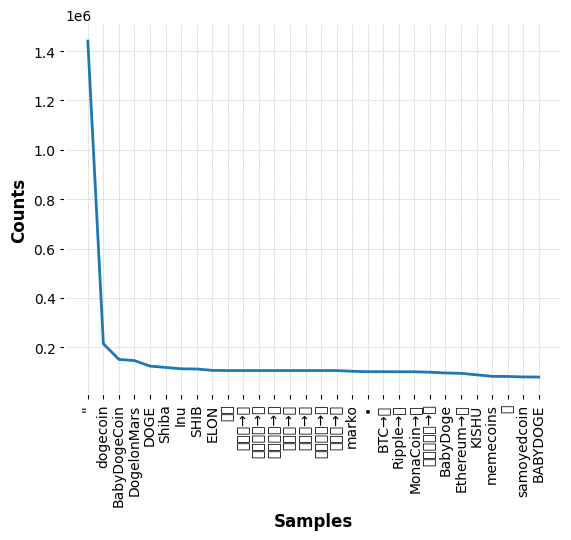

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [267]:
data_analysispost = nltk.FreqDist(filter_words)
 
data_analysispost.plot(30, cumulative=False)


Sentiment Analysis


In [268]:
import numpy as np
import pandas as pd

In [269]:
df = pd.read_csv('data-clensing.csv')

C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [270]:
df.shape

(255151, 4)

In [271]:
df.head()

,Date,TweetNo,User,Tweet
0,2022-02-06,1,Filimon1987,RT @hardbitspace: BitTorrent 10000.\nRetweet t...
1,2022-02-06,2,amir_shazrin,RT @ElonPunkYC: Floor went from 5 ETH to 8.6 E...
2,2022-02-06,3,umit587,RT @fzthsyn: Tercihini hangi kedilerden yana ...
3,2022-02-06,4,realwhalehacker,"""The FTX ad with Brady had some charm, it's cu..."
4,2022-02-06,5,hasanKylp33,RT @fzthsyn: Tercihini hangi kedilerden yana ...


In [272]:
import re 
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [273]:
corpus=[df]

for i in range(46256, 5):
  review = re.sub('[^a-zA-Z]', ' ', df['Tweet'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)


In [274]:
corpus

[              Date TweetNo             User  \
 0       2022-02-06       1      Filimon1987   
 1       2022-02-06       2     amir_shazrin   
 2       2022-02-06       3          umit587   
 3       2022-02-06       4  realwhalehacker   
 4       2022-02-06       5      hasanKylp33   
 ...            ...     ...              ...   
 255146  2022-04-10  255259     reynabigwins   
 255147  2022-04-10  255260        Jadengore   
 255148  2022-04-10  255261      ReinBigtoun   
 255149  2022-04-10  255262  managercrypto90   
 255150  2022-04-10  255263      IamBigman69   
 
                                                     Tweet  
 0       RT @hardbitspace: BitTorrent 10000.\nRetweet t...  
 1       RT @ElonPunkYC: Floor went from 5 ETH to 8.6 E...  
 2       RT @fzthsyn: Tercihini hangi kedilerden yana  ...  
 3       "The FTX ad with Brady had some charm, it's cu...  
 4       RT @fzthsyn: Tercihini hangi kedilerden yana  ...  
 ...                                                   .

In [275]:
#@okex_brasil

In [276]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
#Sentiment Analysis
SA = SentimentIntensityAnalyzer()
df["Tweet"]= df["Tweet"].astype(str)
# Applying Model, Variable Creation
df['Polarity Score']=df["Tweet"].apply(lambda x:SA.polarity_scores(x)['compound'])
df['Neutral Score']=df["Tweet"].apply(lambda x:SA.polarity_scores(x)['neu'])
df['Negative Score']=df["Tweet"].apply(lambda x:SA.polarity_scores(x)['neg'])
df['Positive Score']=df["Tweet"].apply(lambda x:SA.polarity_scores(x)['pos'])


# Converting 0 to 1 Decimal Score to a Categorical Variable
df['Sentiment']=''
df.loc[df['Polarity Score']>0,'Sentiment']='Positive'
df.loc[df['Polarity Score']==0,'Sentiment']='Neutral'
df.loc[df['Polarity Score']<0,'Sentiment']='Negative'



df[:100]
#df.to_csv('Sentimental-data.csv')

,Date,TweetNo,User,Tweet,Polarity Score,Neutral Score,Negative Score,Positive Score,Sentiment
0,2022-02-06,1,Filimon1987,RT @hardbitspace: BitTorrent 10000.\nRetweet t...,0.0000,1.000,0.000,0.000,Neutral
1,2022-02-06,2,amir_shazrin,RT @ElonPunkYC: Floor went from 5 ETH to 8.6 E...,0.0000,1.000,0.000,0.000,Neutral
2,2022-02-06,3,umit587,RT @fzthsyn: Tercihini hangi kedilerden yana ...,0.0000,1.000,0.000,0.000,Neutral
3,2022-02-06,4,realwhalehacker,"""The FTX ad with Brady had some charm, it's cu...",0.6908,0.769,0.000,0.231,Positive
4,2022-02-06,5,hasanKylp33,RT @fzthsyn: Tercihini hangi kedilerden yana ...,0.0000,1.000,0.000,0.000,Neutral
...,...,...,...,...,...,...,...,...,...
95,2022-02-06,96,E__dollar,RT @shegzynanah: @W3stSideCryp @marvininu @Mar...,0.6597,0.645,0.089,0.266,Positive
96,2022-02-06,97,HamidJahanfakhr,RT @MemesCoinLover: What is the top #Token com...,0.2023,0.899,0.000,0.101,Positive
97,2022-02-06,98,itnyeinchanko,RT @ElonPunkYC: Floor went from 5 ETH to 8.6 E...,0.0000,1.000,0.000,0.000,Neutral
98,2022-02-06,99,rodamus444,RT @ElonPunkYC: Floor went from 5 ETH to 8.6 E...,0.0000,1.000,0.000,0.000,Neutral


In [277]:
df.loc[df['Polarity Score']>0,'Sentiment']
df['Date']= pd.to_datetime(df['Date'])
dfagg=df.groupby(by='Date').agg('mean')
dfagg[dfagg['Polarity Score']<0]
#dfagg2=dfagg.iloc[:,[1]]
#dfagg2.to_csv('dfagg2.csv')
dfagg

,Polarity Score,Neutral Score,Negative Score,Positive Score
Date,,,,
2022-02-06,0.259914,0.875484,0.021574,0.103003
2022-02-07,0.215312,0.908980,0.010099,0.080921
2022-02-08,0.149469,0.932775,0.009386,0.057860
2022-02-09,0.289365,0.890400,0.004510,0.105106
2022-02-10,0.193530,0.898696,0.017984,0.082852
...,...,...,...,...
2022-04-06,0.070050,0.933408,0.019779,0.046814
2022-04-07,0.121249,0.940040,0.007614,0.052345
2022-04-08,0.127558,0.926487,0.012309,0.061204


In [278]:
dfagg2=dfagg.iloc[:,[0]]
#dfagg2.to_csv('dfagg2.csv')
dfagg2

,Polarity Score
Date,
2022-02-06,0.259914
2022-02-07,0.215312
2022-02-08,0.149469
2022-02-09,0.289365
2022-02-10,0.193530
...,...
2022-04-06,0.070050
2022-04-07,0.121249
2022-04-08,0.127558


Mering the data from the web scraper and the polarity scores from the daily sentiment


In [279]:
#mergedf = pd.merge(doge, dfagg, on='Date', how='inner')

In [323]:
mergedf = pd.concat([doge, dfagg2], axis=1, sort=True, join='inner')

In [324]:
mergedf

,Open,High,Low,Close,Adj Close,Volume,MarktCap,MA50,MA200,Polarity Score
Date,,,,,,,,,,
2022-02-06,0.147140,0.154775,0.145258,0.153770,0.153770,757004142,1.113856e+08,NaN,NaN,0.259914
2022-02-07,0.153803,0.171586,0.151741,0.165578,0.165578,1791358822,2.755164e+08,NaN,NaN,0.215312
2022-02-08,0.165606,0.169145,0.153709,0.158405,0.158405,1190116000,1.970904e+08,NaN,NaN,0.149469
2022-02-09,0.158357,0.160704,0.155035,0.159123,0.159123,778670798,1.233080e+08,NaN,NaN,0.289365
2022-02-10,0.159145,0.160437,0.151497,0.151889,0.151889,1053630584,1.676800e+08,NaN,NaN,0.193530
...,...,...,...,...,...,...,...,...,...,...
2022-04-05,0.148614,0.178045,0.147727,0.172907,0.172907,5230288678,7.772941e+08,0.129814,NaN,0.115510
2022-04-06,0.172485,0.173497,0.143291,0.143417,0.143417,3729047979,6.432048e+08,0.130344,NaN,0.070050
2022-04-07,0.143432,0.148028,0.141312,0.146102,0.146102,1420790611,2.037868e+08,0.130177,NaN,0.121249


In [282]:
#mergedf.to_csv('lstm.csv')

plotting all the coins respective of the days the data gathered

In [283]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import yfinance as yf
%matplotlib inline

In [318]:
start = "2022-1-06"
end = '2022-4-10'
doge = yf.download('DOGE-USD',start,end)
mona = yf.download('MONA-USD',start,end)
shib = yf.download('SHIB-USD',start,end)
soma = yf.download('SAMO-USD',start,end)
elon = yf.download('ELON-USD',start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Exploratory Analysis

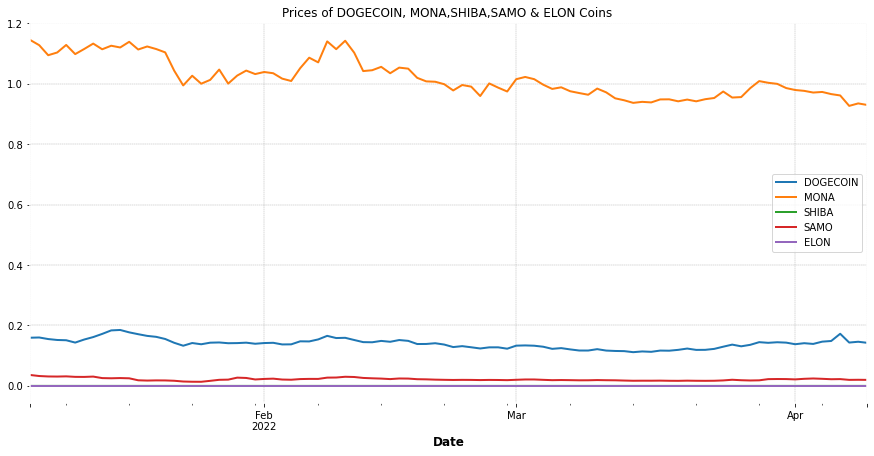

In [319]:
doge['Open'].plot(label = 'DOGECOIN', figsize = (15,7))
mona['Open'].plot(label = 'MONA')
shib['Open'].plot(label = 'SHIBA')
soma['Open'].plot(label = 'SAMO')
elon['Open'].plot(label = 'ELON')
plt.title('Prices of DOGECOIN, MONA,SHIBA,SAMO & ELON Coins ')
plt.legend()

Volume Traded

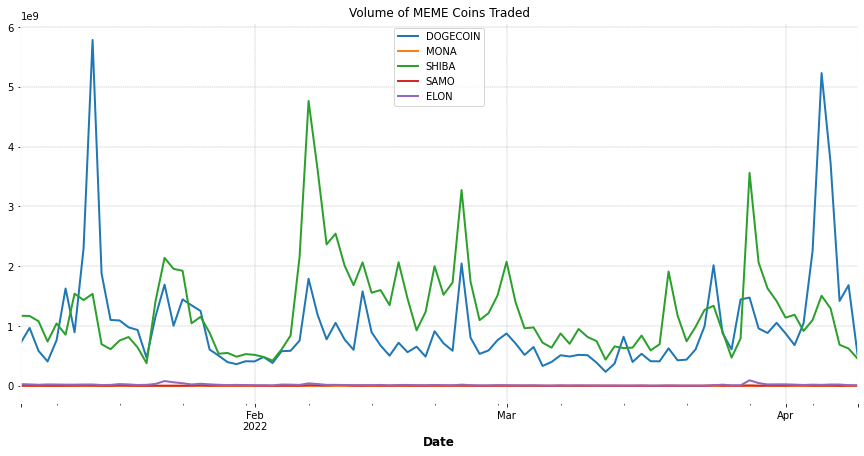

In [320]:
doge['Volume'].plot(label = 'DOGECOIN', figsize = (15,7))
mona['Volume'].plot(label = "MONA")
shib['Volume'].plot(label = 'SHIBA')
soma['Volume'].plot(label = "SAMO")
elon['Volume'].plot(label = 'ELON')
plt.title('Volume of MEME Coins Traded')
plt.legend()

Market Capitalisation

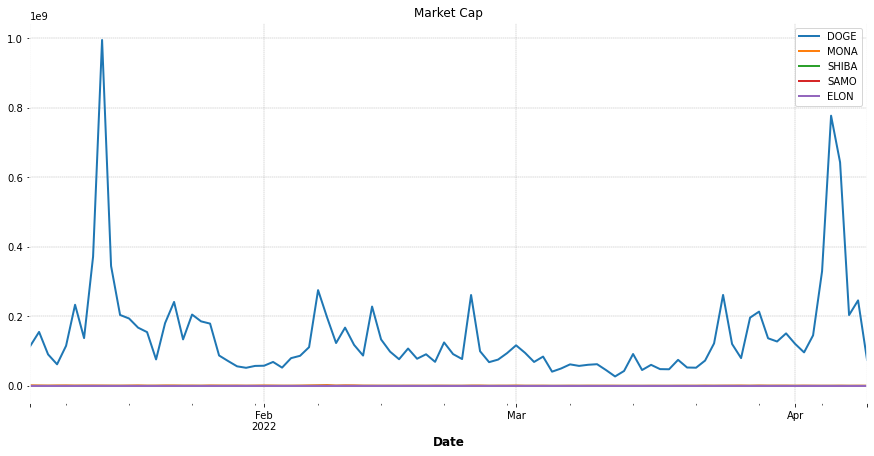

In [321]:
doge['MarktCap'] = doge['Open'] * doge['Volume']
mona['MarktCap'] = mona['Open'] * mona['Volume']
shib['MarktCap'] = shib['Open'] * shib['Volume']
soma['MarktCap'] = soma['Open'] * soma['Volume']
elon['MarktCap'] = elon['Open'] * elon['Volume']
doge['MarktCap'].plot(label = 'DOGE', figsize = (15,7))
mona['MarktCap'].plot(label = 'MONA')
shib['MarktCap'].plot(label = 'SHIBA')
soma['MarktCap'].plot(label = 'SAMO')
elon['MarktCap'].plot(label = 'ELON')
plt.title('Market Cap')
plt.legend()

Moving Average DOGECOIN

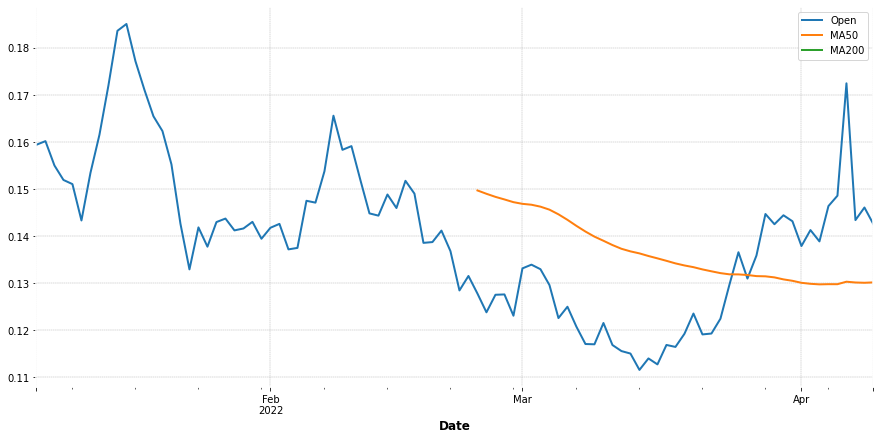

In [322]:
doge['MA50'] = doge['Open'].rolling(50).mean()
doge['MA200'] = doge['Open'].rolling(200).mean()
doge['Open'].plot(figsize = (15,7))
doge['MA50'].plot()
doge['MA200'].plot()
plt.legend()

Percentage increase in Coins value

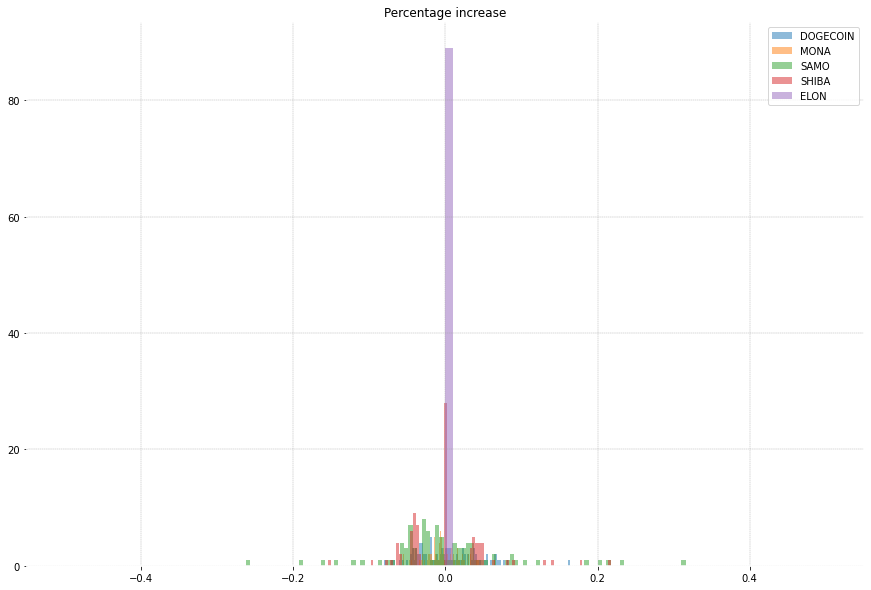

In [289]:
doge['returns'] = (doge['Close']/doge['Close'].shift(1)) -1
mona['returns'] = (mona['Close']/mona['Close'].shift(1))-1
soma['returns'] = (soma['Close']/soma['Close'].shift(1)) - 1
shib['returns'] = (shib['Close']/shib['Close'].shift(1))-1
elon['returns'] = (elon['Close']/elon['Close'].shift(1)) - 1
doge['returns'].hist(bins = 100, label = 'DOGECOIN', alpha = 0.5, figsize = (15,10))
mona['returns'].hist(bins = 100, label = 'MONA', alpha = 0.5)
soma['returns'].hist(bins = 100, label = 'SAMO', alpha = 0.5)
shib['returns'].hist(bins = 100, label = 'SHIBA', alpha = 0.5)
elon['returns'].hist(bins = 100, label = 'ELON', alpha = 0.5)
plt.title('Percentage increase')
plt.legend()

LSTM testing 

In [290]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import pandas_datareader.data as web

In [291]:
Doge = web.DataReader('DOGE-USD','yahoo',start ='2019-01-01',end = '2022-04-08')

In [292]:
Doge.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-04-05,0.178045,0.147727,0.148614,0.172907,5230288678,0.172907
2022-04-06,0.173497,0.143291,0.172485,0.143417,3729047979,0.143417
2022-04-07,0.148028,0.141312,0.143432,0.146102,1420790611,0.146102
2022-04-08,0.152716,0.141608,0.146106,0.142549,1683800631,0.142549
2022-04-09,0.144462,0.141416,0.142544,0.144303,523997409,0.144303


In [293]:
Doge.shape

(1195, 6)

In [294]:
#data = Doge.to_csv('LSTMdoge.csv')


In [295]:
data = pd.read_csv('LSTMdoge.csv',date_parser = True)


In [296]:
data.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
1187,2022-04-02,0.144069,0.138882,0.141310,0.138913,682408266,0.138913
1188,2022-04-03,0.148558,0.137088,0.138903,0.146453,1047399132,0.146453
1189,2022-04-04,0.155312,0.142008,0.146413,0.148591,2253509569,0.148591
1190,2022-04-05,0.178045,0.147727,0.148614,0.172907,5230288678,0.172907
1191,2022-04-06,0.172790,0.157570,0.172020,0.157570,6170317824,0.157570


In [297]:
data.shape


(1192, 7)

In [298]:
data_training = data[data['Date']<'2022-01-01'].copy()
data_test = data[data['Date']>='2022-01-01'].copy()

In [299]:
data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)

In [300]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[1.05984740e-03, 1.77123551e-03, 1.17448021e-03, 1.25139055e-03,
        7.99973571e-05],
       [1.14952685e-03, 1.85361841e-03, 1.23568154e-03, 1.27334460e-03,
        8.93728415e-05],
       [1.08974044e-03, 1.82725602e-03, 1.25899612e-03, 1.20455487e-03,
        8.36644198e-05],
       ...,
       [2.38774111e-01, 2.72709292e-01, 2.51442241e-01, 2.43293720e-01,
        1.16978179e-02],
       [2.36643540e-01, 2.70437170e-01, 2.42760405e-01, 2.48486619e-01,
        8.46445733e-03],
       [2.35995401e-01, 2.73610573e-01, 2.47394206e-01, 2.47290844e-01,
        9.11547547e-03]])

In [301]:
X_train = []
y_train = []

for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [302]:
data_training.shape

(1096, 5)

In [303]:
X_train.shape

(1036, 60, 5)

In [304]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [305]:
regressor = Sequential()

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [306]:
regressor.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 60, 60)            15840     
                                                                 
 dropout_8 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_9 (LSTM)               (None, 60, 60)            29040     
                                                                 
 dropout_9 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_10 (LSTM)              (None, 60, 80)            45120     
                                                                 
 dropout_10 (Dropout)        (None, 60, 80)            0         
                                                                 
 lstm_11 (LSTM)              (None, 120)              

In [307]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs=1, batch_size=32)

33/33 [==============================] - 8s 143ms/step - loss: 0.0147


In [308]:
data_test.head()

,Date,High,Low,Open,Close,Volume,Adj Close
1096,2022-01-01,0.173423,0.170353,0.170510,0.173035,371336089,0.173035
1097,2022-01-02,0.175989,0.171201,0.173027,0.174403,391041933,0.174403
1098,2022-01-03,0.174406,0.168271,0.174406,0.170088,505900382,0.170088
1099,2022-01-04,0.172339,0.168128,0.170151,0.168803,541922892,0.168803
1100,2022-01-05,0.170747,0.151898,0.168835,0.159420,994086848,0.159420


In [309]:
past_60_days = data_test.tail(60)

In [310]:
df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,0.154775,0.145258,0.147140,0.153770,757004142
1,0.171586,0.151741,0.153803,0.165578,1791358822
2,0.169145,0.153709,0.165606,0.158405,1190116000
3,0.160704,0.155035,0.158357,0.159123,778670798
4,0.160437,0.151497,0.159145,0.151889,1053630584


In [311]:
inputs = scaler.transform(df)
inputs

array([[0.20811462, 0.23728128, 0.21216417, 0.22281043, 0.0107378 ],
       [0.23095706, 0.24796307, 0.22187332, 0.24009278, 0.02564229],
       [0.22764028, 0.25120566, 0.23907232, 0.22959429, 0.01697871],
       [0.21617083, 0.25339048, 0.22850926, 0.23064516, 0.01105   ],
       [0.21580803, 0.24756106, 0.22965752, 0.22005736, 0.01501203],
       [0.20715534, 0.23413592, 0.21909303, 0.2097506 , 0.01102205],
       [0.19756778, 0.23138267, 0.208836  , 0.20910369, 0.00851435],
       [0.21161891, 0.23525962, 0.20814093, 0.21575287, 0.02261208],
       [0.20180582, 0.2346302 , 0.21468361, 0.21144252, 0.01277009],
       [0.20461441, 0.23719066, 0.21049718, 0.21987002, 0.00955561],
       [0.20410486, 0.2397742 , 0.21892399, 0.21596803, 0.00711504],
       [0.20147564, 0.22543955, 0.21494737, 0.20053713, 0.01022451],
       [0.19088802, 0.223609  , 0.19971119, 0.20085328, 0.00795408],
       [0.19606362, 0.22655996, 0.1999589 , 0.20442157, 0.00927925],
       [0.18966512, 0.22178338, 0.

In [312]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((96, 60, 5), (96,))

In [313]:
y_pred = regressor.predict(X_test)

In [314]:
scaler.scale_

array([1.35877872e+00, 1.64766088e+00, 1.45717154e+00, 1.46361450e+00,
       1.44094570e-11])

In [315]:
scale = 1/8.18605127e-04
scale

1221.5901990069017

In [316]:
y_pred = y_pred*scale
y_test = y_test*scale

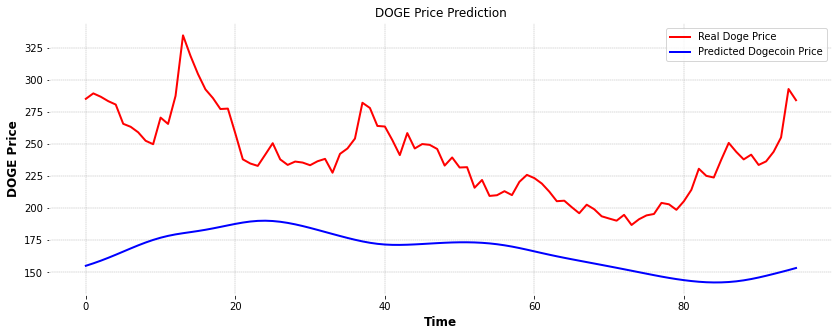

In [317]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Doge Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Dogecoin Price')
plt.title('DOGE Price Prediction')
plt.xlabel('Time')
plt.ylabel('DOGE Price')
plt.legend()
plt.show()